In [1]:
import pandas as pd
import matplotlib.colors as colors
import matplotlib.pyplot as plt
#import matplotlib.cbook
#from pybloqs import Block
#import pybloqs.block.table_formatters as tf
#from IPython.core.display import display, HTML
import numpy as np
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.spatial import distance
#from fastcluster import flinkage
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import jaccard_similarity_score
import itertools
from math import *
from ete3 import Tree
import re

In [ ]:
###Importing data as dataframe

In [2]:
file3='effector_occurrence_count.csv'
dfc=pd.read_csv(file3)
sp3=list(dfc['sp'])
dfc.drop(['Unnamed: 361', 'row','sp'], axis=1, inplace=True)
dfc;

In [3]:
#fillna works on updated pandas version
#df2.replace(to_replace="NaN", value=int(0), inplace=True)
dfc.fillna(value=int(0),inplace=True)
dfc.index=sp3
del dfc.index.name
dfc.describe()

model0110015  model0110039  model0110050  model0110051  model0110096  \
count    113.000000    113.000000    113.000000    113.000000    113.000000   
mean       0.654867      1.044248      1.070796      1.035398      0.991150   
std        1.155499      0.618024      0.664358      0.596556      0.389495   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      1.000000      1.000000      1.000000      1.000000   
50%        0.000000      1.000000      1.000000      1.000000      1.000000   
75%        2.000000      1.000000      1.000000      1.000000      1.000000   
max        4.000000      5.000000      3.000000      3.000000      4.000000   

       model0110142  model0110177  model0110188  model0110275  model0110338  \
count    113.000000    113.000000    113.000000    113.000000    113.000000   
mean       1.000000      0.982301      0.982301      0.973451      0.955752   
std        0.231455      0.266669      0.266669      0.248574      0.246018   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      1.000000      1.000000      1.000000   
50%        1.000000      1.000000      1.000000      1.000000      1.000000   
75%        1.000000      1.000000      1.000000      1.000000      1.000000   
max        2.000000      2.000000      2.000000      2.000000      2.000000   

           ...       model0126889  model0126892  model0126919  model0126937  \
count      ...         113.000000    113.000000    113.000000    113.000000   
mean       ...           0.017699      0.017699      0.017699      0.017699   
std        ...           0.132443      0.132443      0.132443      0.132443   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.000000      0.000000      0.000000      0.000000   
50%        ...           0.000000      0.000000      0.000000      0.000000   
75%        ...           0.000000      0.000000      0.000000      0.000000   
max        ...           1.000000      1.000000      1.000000      1.000000   

       model0126955  model0127125  model0127130  model0127136  model0127554  \
count    113.000000    113.000000    113.000000    113.000000    113.000000   
mean       0.017699      0.017699      0.017699      0.017699      0.017699   
std        0.132443      0.132443      0.132443      0.132443      0.132443   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       model0127935  
count    113.000000  
mean       0.017699  
std        0.132443  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 359 columns]

### Tree - stuff

In [4]:
#importing real tree
filename='bayes_newick.tre'
bayes_nw=open(filename,"r")
bn=bayes_nw.read()
bayes_nw.close()
bayes_t=Tree(bn)
bleaves=[]
for leaf in bayes_t:
    le=str(leaf)
    print le
    l=re.sub('\n--','',le)
    bleaves.append(l)
print len(bleaves)


--Legionella_tucsonensis_ATCC_49180

--Legionella_anisa_WA_316_C3

--Legionella_parisiensis_PF_209_C_C2

--Fluoribacter_bozemanae_WIGA

--Legionella_wadsworthii_DSM_21896_ATCC_3

--Fluoribacter_gormanii_LS_13

--Legionella_steigerwaltii_SC_18_C9

--Legionella_steelei_IMVS3376

--Legionella_cherrii_ORW

--Fluoribacter_dumoffii_NY_23

--Legionella_sainthelensi_ATCC_35248

--Legionella_longbeachae_NSW150

--Legionella_santicrucis_SC_63_C7

--Legionella_cincinnatiensis_CDC_72_OH_14

--Legionella_gratiana_Lyon_8420412

--Legionella_sp_40_6

--Legionella_saoudiensis_LH_SWC

--Legionella_drancourtii_LLAP12

--Legionella_quateirensis_ATCC_49507

--Legionella_moravica_DSM_19234

--Legionella_worsleiensis_ATCC_49508

--Legionella_shakespearei_DSM_23087

--Legionella_fallonii_LLAP_10

--Legionella_pneumophila_subsp_pneumophil_1

--Legionella_norrlandica_LEGN

--Legionella_waltersii_ATCC_51914

--Legionella_israelensis_Bercovier_4

--Legionella_nautarum_ATCC_49506

--Legionella_drozanskii_LLAP_1_

In [5]:
ordered_dfc=dfc.reindex(bleaves)
models=ordered_dfc.columns.tolist()
#type(models)
#models[1]

'model0110039'

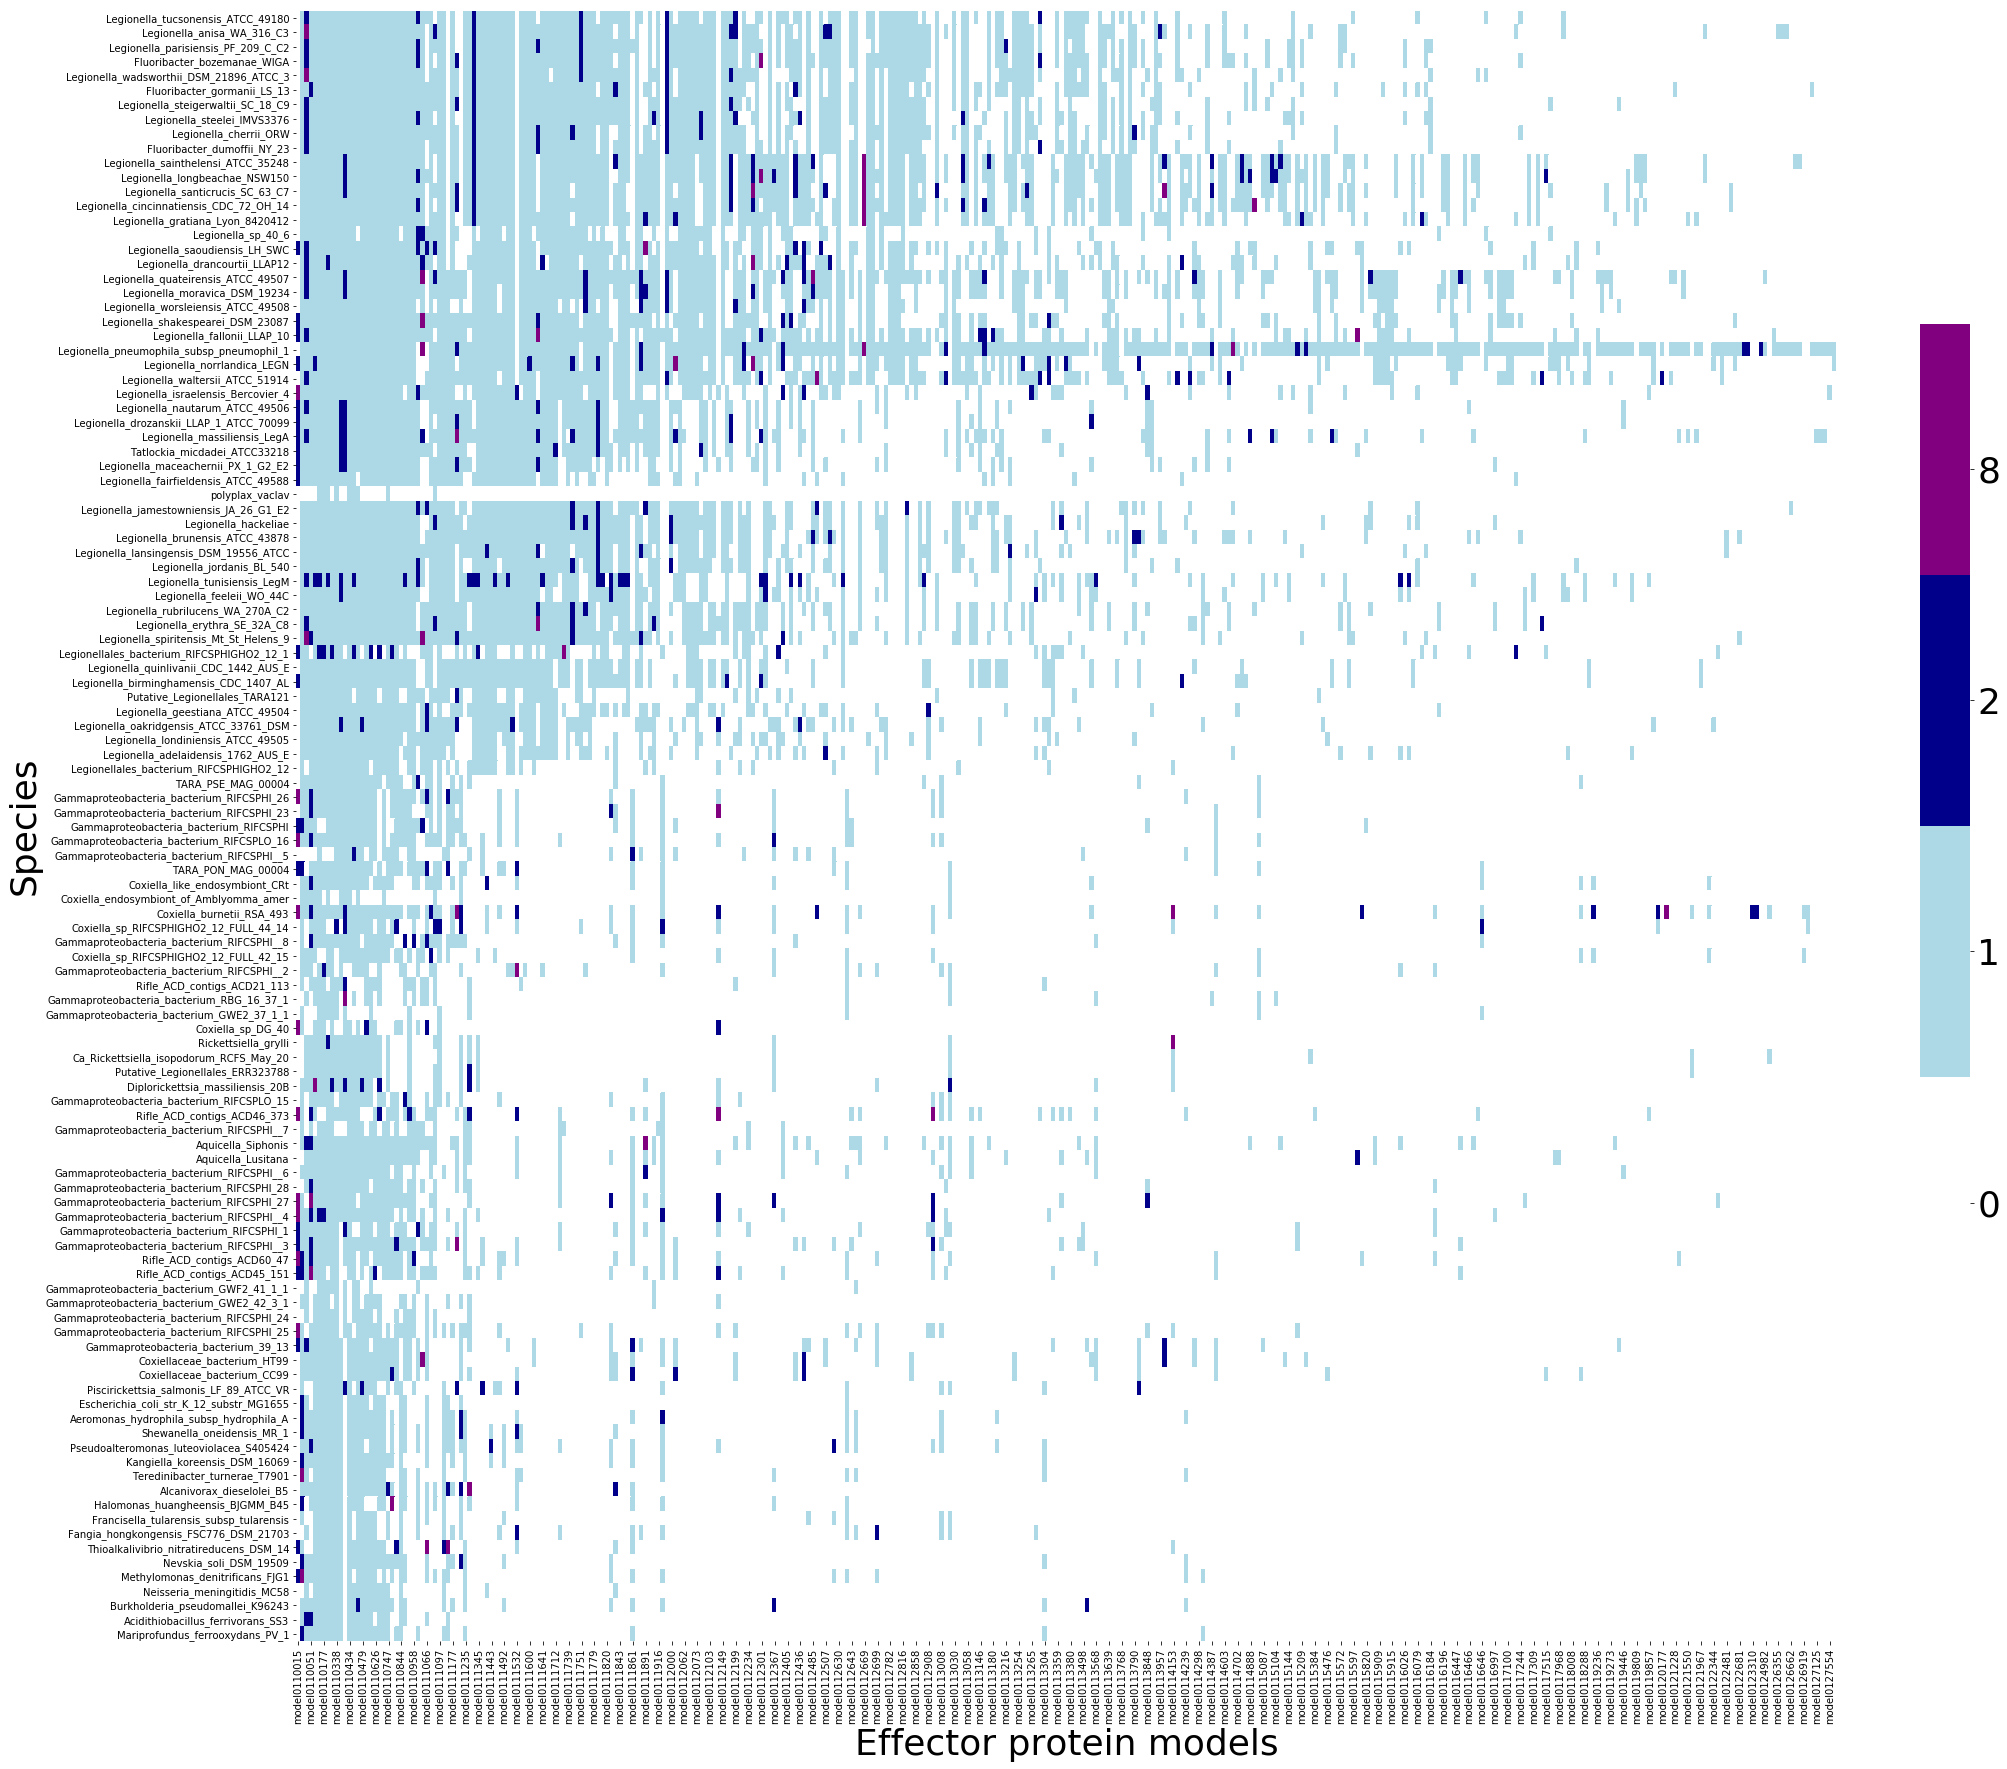

In [6]:
#Heatmap of model copy counts
figure2=plt.figure(figsize=(30,30))
bounds=[-0.5,0.5,1.5,2.5,15.5]
cmap=colors.ListedColormap(['white', 'lightblue', 'darkblue', 'purple'])
norm=colors.BoundaryNorm(bounds, cmap.N)
figure2=sns.heatmap(ordered_dfc, cmap=cmap, norm=norm, cbar_kws={"ticks":[0,1,2,8], "fraction":0.03})
cax=plt.gcf().axes[-1]
cax.tick_params(labelsize=36)
plt.ylabel('Species',size=36)
plt.xlabel('Effector protein models', size=36)
sns.set_style('white')
plt.show(figure2)

In [6]:
#generating lists with group names
group=range(1,114)
bgroups=[]
sgroups=[]
for i in group:
    if i<55:
        bgroups.append("Legionellaceae")
        sgroups.append("Legionellaceae")
    elif (i>54 and i<96):
        bgroups.append("Coxiellaceae")
        if (i>54 and i<72):
            sgroups.append("Coxiella")
        elif (i>71 and i<77):
            sgroups.append("Rickettsiella")
        elif (i>76 and i<81):
            sgroups.append("Aquicella")
        elif (i>80 and i <93):
            sgroups.append("Gammaproteobacteria bacterium")
        else:
            sgroups.append("Berkiella")
    elif (i>95 and i<114):
        bgroups.append("Outgroup")
        sgroups.append("Outgroup")

In [7]:
#Setting up new dataframe with group names
df_groups=ordered_dfc
df_groups['bgroup']=pd.Series(bgroups, index=df_groups.index)
df_groups['sgroup']=pd.Series(sgroups, index=df_groups.index)

In [8]:
#grouping by big groups
bgrouped=df_groups.groupby(df_groups['bgroup'])
bgrouped.describe().loc[:,(slice(None),('mean'))]

model0110015 model0110039 model0110050 model0110051  \
                       mean         mean         mean         mean   
bgroup                                                               
Coxiellaceae       1.024390     0.878049     0.756098     1.219512   
Legionellaceae     0.518519     0.981481     1.388889     1.000000   
Outgroup           0.222222     1.611111     0.833333     0.722222   

               model0110096 model0110142 model0110177 model0110188  \
                       mean         mean         mean         mean   
bgroup                                                               
Coxiellaceae       0.951220     0.951220     0.926829     0.902439   
Legionellaceae     1.018519     1.037037     1.018519     1.037037   
Outgroup           1.000000     1.000000     1.000000     1.000000   

               model0110275 model0110338     ...      model0126889  \
                       mean         mean     ...              mean   
bgroup                                       ...                     
Coxiellaceae       0.926829     0.878049     ...          0.000000   
Legionellaceae     1.000000     1.000000     ...          0.037037   
Outgroup           1.000000     1.000000     ...          0.000000   

               model0126892 model0126919 model0126937 model0126955  \
                       mean         mean         mean         mean   
bgroup                                                               
Coxiellaceae       0.000000      0.04878      0.04878     0.000000   
Legionellaceae     0.037037      0.00000      0.00000     0.037037   
Outgroup           0.000000      0.00000      0.00000     0.000000   

               model0127125 model0127130 model0127136 model0127554  \
                       mean         mean         mean         mean   
bgroup                                                               
Coxiellaceae       0.000000     0.000000     0.000000     0.000000   
Legionellaceae     0.037037     0.037037     0.037037     0.037037   
Outgroup           0.000000     0.000000     0.000000     0.000000   

               model0127935  
                       mean  
bgroup                       
Coxiellaceae       0.000000  
Legionellaceae     0.037037  
Outgroup           0.000000  

[3 rows x 359 columns]

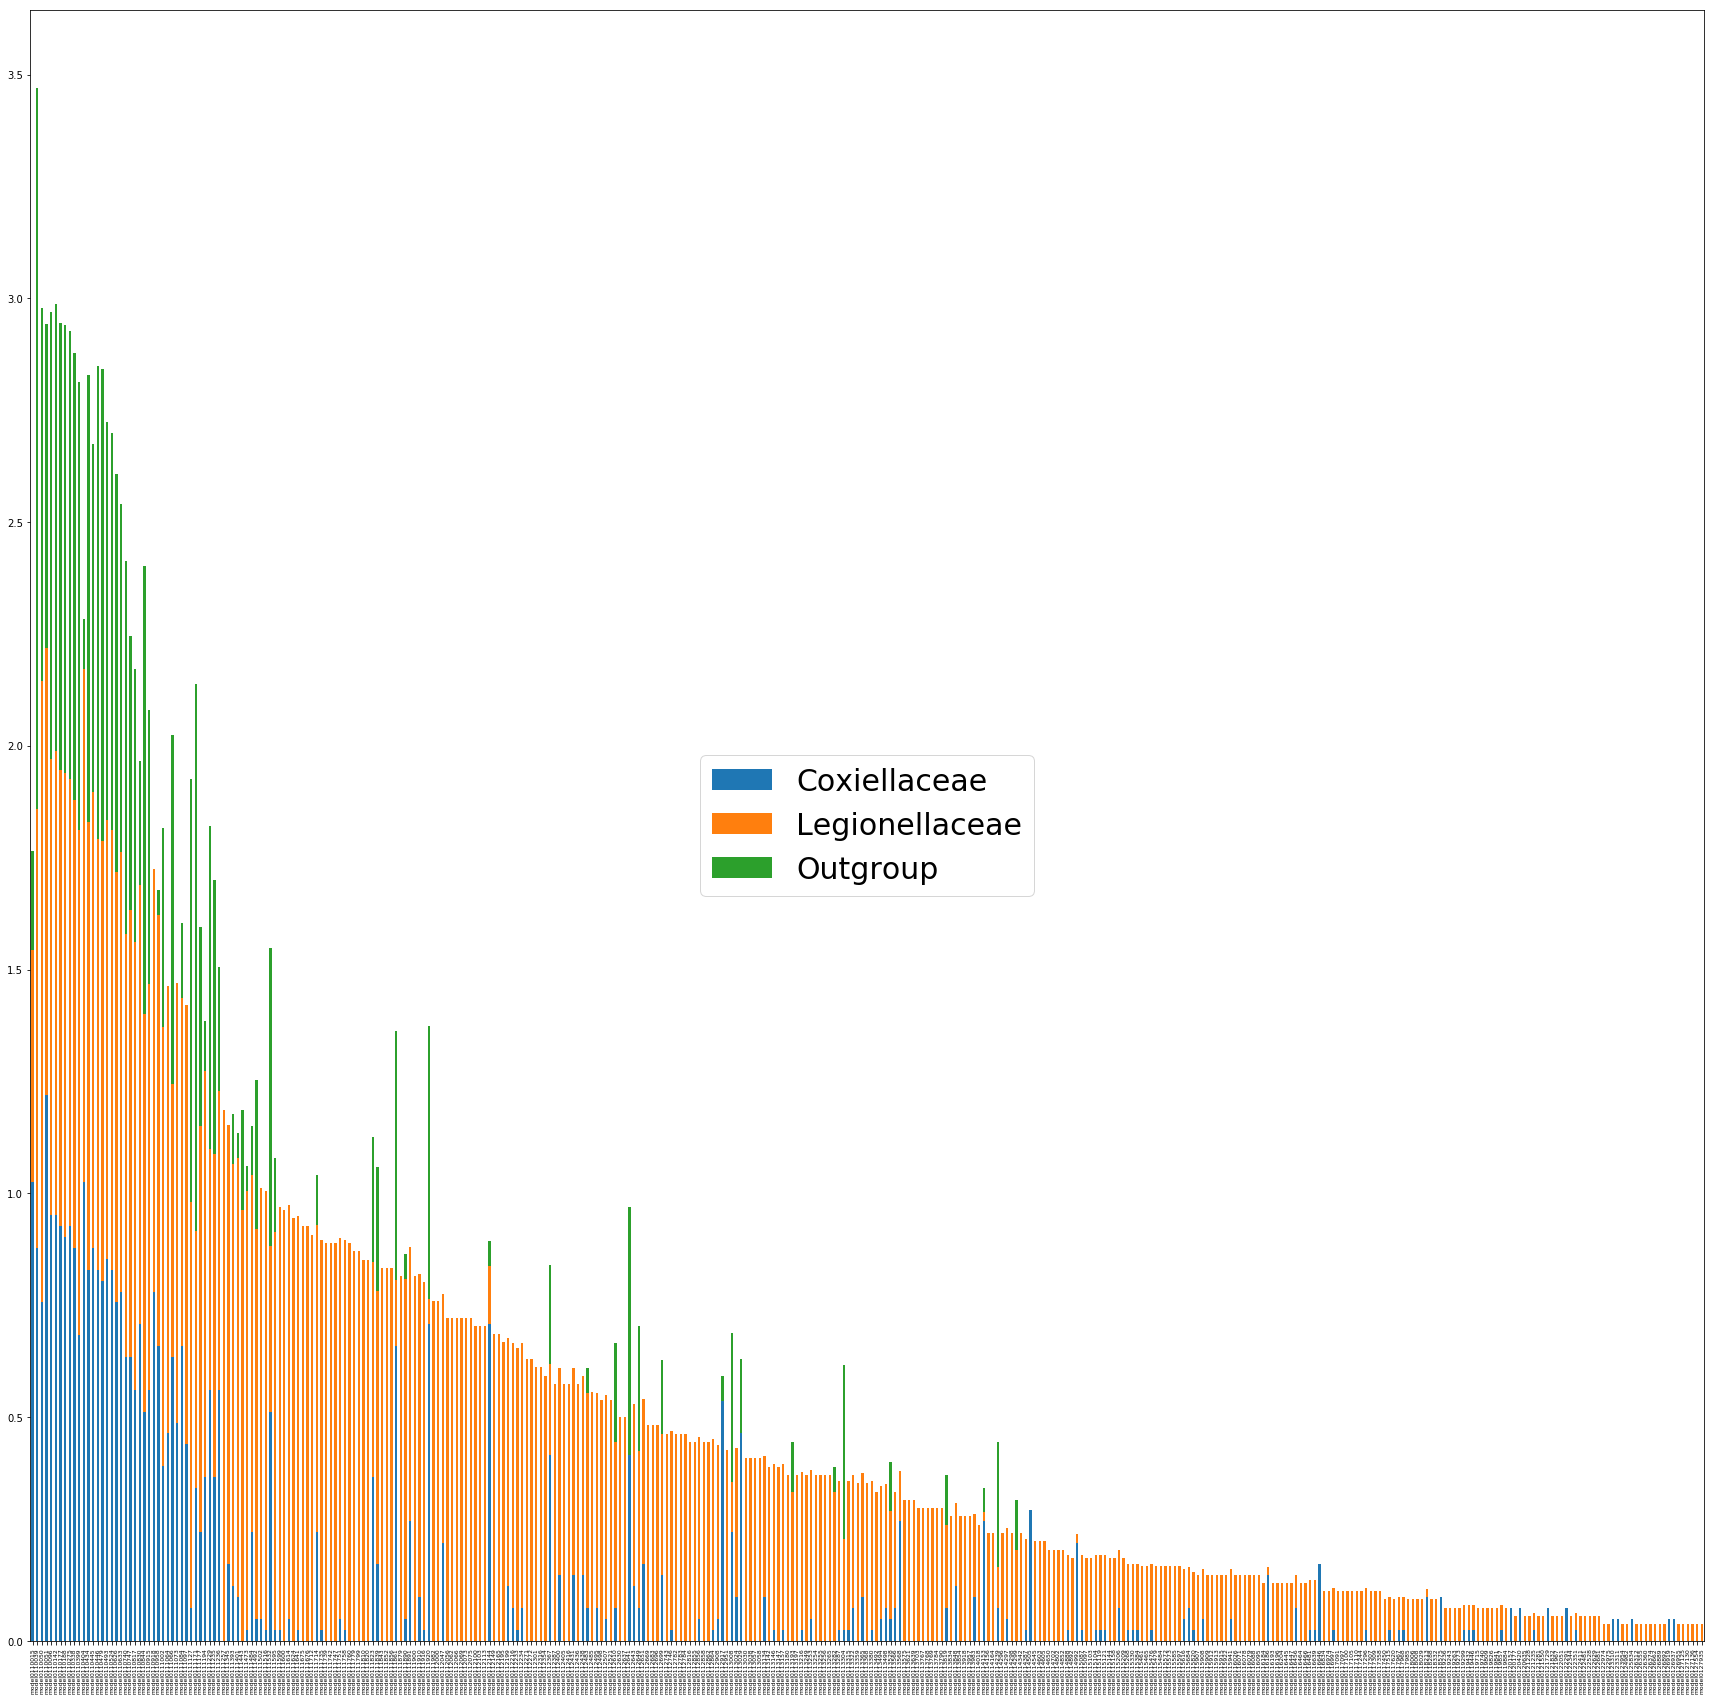

In [130]:
#plotting means for models for all groups
bgrouped.mean().unstack().unstack().plot(kind='bar', align='center', figsize=(30,30), stacked=True)
plt.tick_params(axis='x', labelsize=6, labelrotation=90)
plt.legend(prop={'size':30},loc=10)

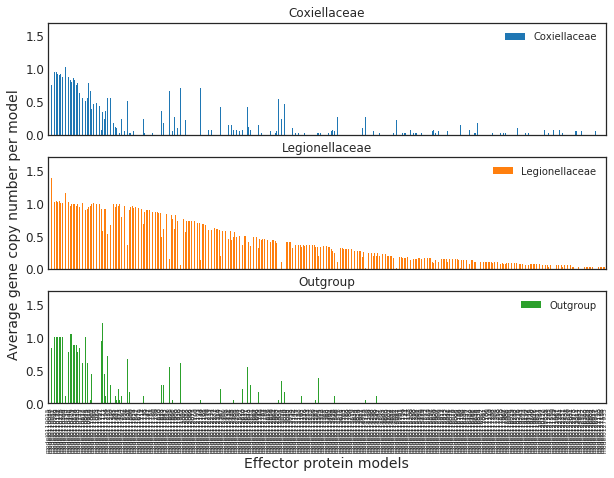

In [47]:
#Plotting with subplots instead
figbg, axesbg=plt.subplots(figsize=(10,7)) 
bgrouped.mean().unstack().unstack().plot(ax=axesbg,kind='bar',subplots=True, sharex=True, ylim=((0,1.7)), fontsize=12)
plt.ylabel('Average gene copy number per model',position=(-1,1.6), size=14)
plt.xlabel('Effector protein models', size=14)
plt.tick_params(axis='x', labelsize=6, labelrotation=90)
axesbg.title.set_fontsize(14)

Coxiellaceae
nothing
nothing
Legionellaceae
nothing
nothing
Outgroup
nothing
nothing


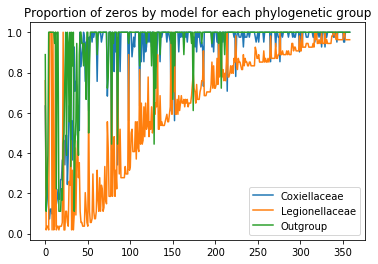

In [9]:
#looping to get common models
zero_data={}
y_data=[]
for name, group in bgrouped:
    print name
    for col,dat in group.iteritems():
        if (col == 'bgroup' or col == 'sgroup'):
            print "nothing"
        else:
            if 0.0 in dat.value_counts().index:
                if name in zero_data:
                    zero_data[name].append(dat.value_counts().loc[0.0]/float(len(dat)))
                    y_data.append(col)
                else:
                    zero_data[name]=[dat.value_counts().loc[0.0]/float(len(dat))]
                    y_data.append(col)
            else:
                if name in zero_data:
                    zero_data[name].append(1)
                    y_data.append(col)

                else:
                    zero_data[name]=[1]
                    y_data.append(col)
    if name != 'other':
        plt.plot(zero_data[name], label=name)
        plt.legend()
        plt.title('Proportion of zeros by model for each phylogenetic group')


In [133]:
#How many models shared with all species? None!
for col,dat in ordered_dfc.iteritems():
    if (col == 'bgroup' or col == 'sgroup'):
        print "nothing"
    else:
        if 0.0 not in dat.value_counts().index:
            print dat.value_counts()

nothing
nothing


In [134]:
#Excluding outgroup, how many models shared with all? None?!
for col, data in df_groups[(df_groups.bgroup != 'Outgroup')| (df_groups.bgroup != 'other')].iteritems():
    if (col == 'bgroup' or col == 'sgroup'):
        print "nothing"
    else:
        if 0.0 not in data.value_counts().index:
            print data.value_counts()

nothing
nothing


In [19]:
#Shared within groups in bgroups
for name, group in bgrouped:
    n=0
    for col,dat in group.iteritems():
        if (col == 'bgroup' or col == 'sgroup'):
            print "nothing"
        else:
            if 0.0 not in dat.value_counts().index:
                #if any(range(1,16)) in dat.value_counts().index :
                n += 1
                print name, col, dat.value_counts()
    print name, n

nothing
nothing
Coxiellaceae 0
Legionellaceae model0110142 1.0    52
2.0     2
Name: model0110142, dtype: int64
Legionellaceae model0110177 1.0    53
2.0     1
Name: model0110177, dtype: int64
Legionellaceae model0110188 1.0    52
2.0     2
Name: model0110188, dtype: int64
Legionellaceae model0110338 1.0    54
Name: model0110338, dtype: int64
Legionellaceae model0110434 1.0    54
Name: model0110434, dtype: int64
Legionellaceae model0110747 1.0    54
Name: model0110747, dtype: int64
nothing
nothing
Legionellaceae 6
Outgroup model0110096 1.0    18
Name: model0110096, dtype: int64
Outgroup model0110142 1.0    18
Name: model0110142, dtype: int64
Outgroup model0110177 1.0    18
Name: model0110177, dtype: int64
Outgroup model0110188 1.0    18
Name: model0110188, dtype: int64
Outgroup model0110275 1.0    18
Name: model0110275, dtype: int64
Outgroup model0110338 1.0    18
Name: model0110338, dtype: int64
Outgroup model0110399 1.0    18
Name: model0110399, dtype: int64
Outgroup model0110434 1.0

In [48]:
#Setting up smaller groups
sgrouped=df_groups.groupby(df_groups['sgroup'])
sgrouped.describe().loc[:,(slice(None),('count','mean','std'))]

model0110015                     model0110039  \
                                     count      mean       std        count   
sgroup                                                                        
Aquicella                              4.0  1.000000  2.000000          4.0   
Berkiella                              3.0  0.666667  1.154701          3.0   
Coxiella                              17.0  1.000000  1.457738         17.0   
Gammaproteobacteria bacterium         12.0  1.583333  1.505042         12.0   
Legionellaceae                        54.0  0.518519  0.966236         54.0   
Outgroup                              18.0  0.222222  0.646762         18.0   
Rickettsiella                          5.0  0.000000  0.000000          5.0   

                                                  model0110050            \
                                   mean       std        count      mean   
sgroup                                                                     
Aquicella                      0.750000  0.500000          4.0  0.750000   
Berkiella                      1.000000  0.000000          3.0  1.333333   
Coxiella                       1.000000  0.500000         17.0  0.588235   
Gammaproteobacteria bacterium  0.916667  0.668558         12.0  0.833333   
Legionellaceae                 0.981481  0.136083         54.0  1.388889   
Outgroup                       1.611111  1.144752         18.0  0.833333   
Rickettsiella                  0.400000  0.547723          5.0  0.800000   

                                        model0110051    ...    model0127130  \
                                    std        count    ...             std   
sgroup                                                  ...                   
Aquicella                      0.957427          4.0    ...        0.000000   
Berkiella                      0.577350          3.0    ...        0.000000   
Coxiella                       0.507300         17.0    ...        0.000000   
Gammaproteobacteria bacterium  0.389249         12.0    ...        0.000000   
Legionellaceae                 0.656367         54.0    ...        0.190626   
Outgroup                       0.514496         18.0    ...        0.000000   
Rickettsiella                  0.447214          5.0    ...        0.000000   

                              model0127136                     model0127554  \
                                     count      mean       std        count   
sgroup                                                                        
Aquicella                              4.0  0.000000  0.000000          4.0   
Berkiella                              3.0  0.000000  0.000000          3.0   
Coxiella                              17.0  0.000000  0.000000         17.0   
Gammaproteobacteria bacterium         12.0  0.000000  0.000000         12.0   
Legionellaceae                        54.0  0.037037  0.190626         54.0   
Outgroup                              18.0  0.000000  0.000000         18.0   
Rickettsiella                          5.0  0.000000  0.000000          5.0   

                                                  model0127935            \
                                   mean       std        count      mean   
sgroup                                                                     
Aquicella                      0.000000  0.000000          4.0  0.000000   
Berkiella                      0.000000  0.000000          3.0  0.000000   
Coxiella                       0.000000  0.000000         17.0  0.000000   
Gammaproteobacteria bacterium  0.000000  0.000000         12.0  0.000000   
Legionellaceae                 0.037037  0.190626         54.0  0.037037   
Outgroup                       0.000000  0.000000         18.0  0.000000   
Rickettsiella                  0.000000  0.000000          5.0  0.000000   

                                         
                                    std  
sgroup                                   
Aquicella

In [82]:
#Models present in small groups, testing
for col, dat in sgrouped.get_group('Aquicella').iteritems():
    print dat.value_counts().index

Index([u'Coxiellaceae'], dtype='object')
Float64Index([0.0, 4.0], dtype='float64')
Float64Index([1.0, 0.0], dtype='float64')
Float64Index([0.0, 1.0, 2.0], dtype='float64')
Float64Index([1.0, 2.0], dtype='float64')
Float64Index([1.0, 0.0], dtype='float64')
Float64Index([1.0, 0.0], dtype='float64')
Float64Index([1.0, 0.0], dtype='float64')
Float64Index([1.0], dtype='float64')
Float64Index([1.0], dtype='float64')
Float64Index([1.0, 0.0], dtype='float64')
Float64Index([1.0, 0.0], dtype='float64')
Float64Index([1.0, 0.0], dtype='float64')
Float64Index([1.0], dtype='float64')
Float64Index([1.0], dtype='float64')
Float64Index([1.0], dtype='float64')
Float64Index([1.0, 0.0], dtype='float64')
Float64Index([1.0, 0.0], dtype='float64')
Float64Index([1.0, 0.0], dtype='float64')
Float64Index([1.0], dtype='float64')
Float64Index([1.0, 0.0, 2.0], dtype='float64')
Float64Index([1.0, 0.0], dtype='float64')
Float64Index([1.0], dtype='float64')
Float64Index([1.0, 0.0], dtype='float64')
Float64Index([1.0]

Float64Index([0.0], dtype='float64')
Float64Index([0.0], dtype='float64')
Float64Index([0.0], dtype='float64')
Float64Index([0.0], dtype='float64')
Float64Index([0.0], dtype='float64')
Float64Index([0.0], dtype='float64')
Float64Index([0.0], dtype='float64')
Float64Index([0.0], dtype='float64')
Float64Index([0.0], dtype='float64')
Float64Index([0.0], dtype='float64')
Float64Index([0.0], dtype='float64')
Float64Index([0.0], dtype='float64')
Float64Index([0.0], dtype='float64')
Float64Index([0.0], dtype='float64')
Float64Index([0.0], dtype='float64')
Float64Index([0.0], dtype='float64')
Float64Index([0.0], dtype='float64')
Float64Index([0.0], dtype='float64')
Float64Index([0.0], dtype='float64')
Float64Index([0.0], dtype='float64')


In [114]:
#Models present in small groups
aqui=[]
rick=[]
berk=[]
cox=[]
leg=[]
for col, dat in sgrouped.get_group('Aquicella').iteritems():
    if 0.0 in dat.value_counts().index:
        if any(range(1,16)) in dat.value_counts().index :
            aqui.append(col)
    elif any(range(1,16)) in dat.value_counts().index :
            aqui.append(col)
for col, dat in sgrouped.get_group('Rickettsiella').iteritems():
    if 0.0 in dat.value_counts().index:
        if any(range(1,16)) in dat.value_counts().index :
            rick.append(col)
    elif any(range(1,16)) in dat.value_counts().index :
        rick.append(col)
for col, dat in sgrouped.get_group('Berkiella').iteritems():
    if 0.0 in dat.value_counts().index:
        if any(range(1,16)) in dat.value_counts().index :
            berk.append(col)
    elif any(range(1,16)) in dat.value_counts().index :
        berk.append(col)
for col, dat in sgrouped.get_group('Coxiella').iteritems():
    if 0.0 in dat.value_counts().index:
        if any(range(1,16)) in dat.value_counts().index :
            cox.append(col)
    elif any(range(1,16)) in dat.value_counts().index :
        cox.append(col)
for col, dat in sgrouped.get_group('Legionellaceae').iteritems():
    if 0.0 in dat.value_counts().index:
        if any(range(1,16)) in dat.value_counts().index :
            leg.append(col)
    elif any(range(1,16)) in dat.value_counts().index :
        leg.append(col)
#aqui
#rick
#berk
print len(aqui), len(rick), len(berk), len(cox), len(leg)

84 47 60 98 339


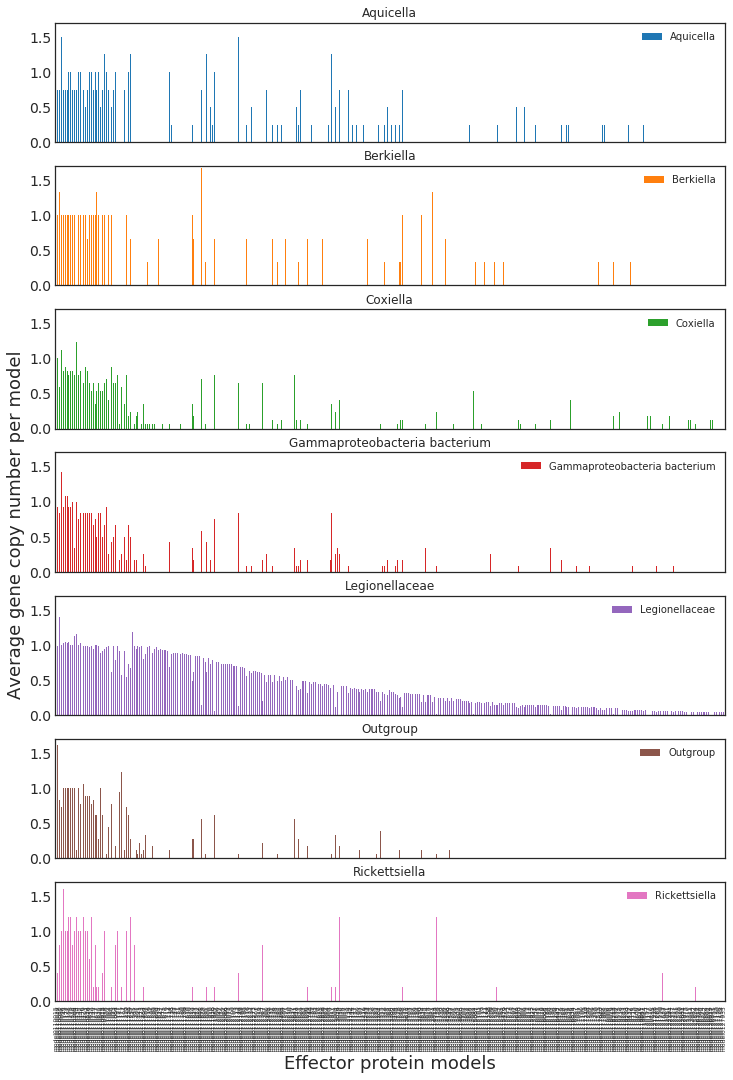

In [84]:
#Plotting average model copy number for small groups, with subplots
figsm, axessm=plt.subplots(figsize=(12,18)) 
sgrouped.mean().unstack().unstack().plot(ax=axessm,kind='bar',subplots=True,sharex=True,ylim=((0,1.7)),fontsize=14)
plt.ylabel('Average gene copy number per model', position=(0,4), size=18)
plt.xlabel('Effector protein models', size=18)
plt.tick_params(axis='x', labelsize=6, labelrotation=90)
axessm.title.set_fontsize(30)
axessm.legend(fontsize=35)

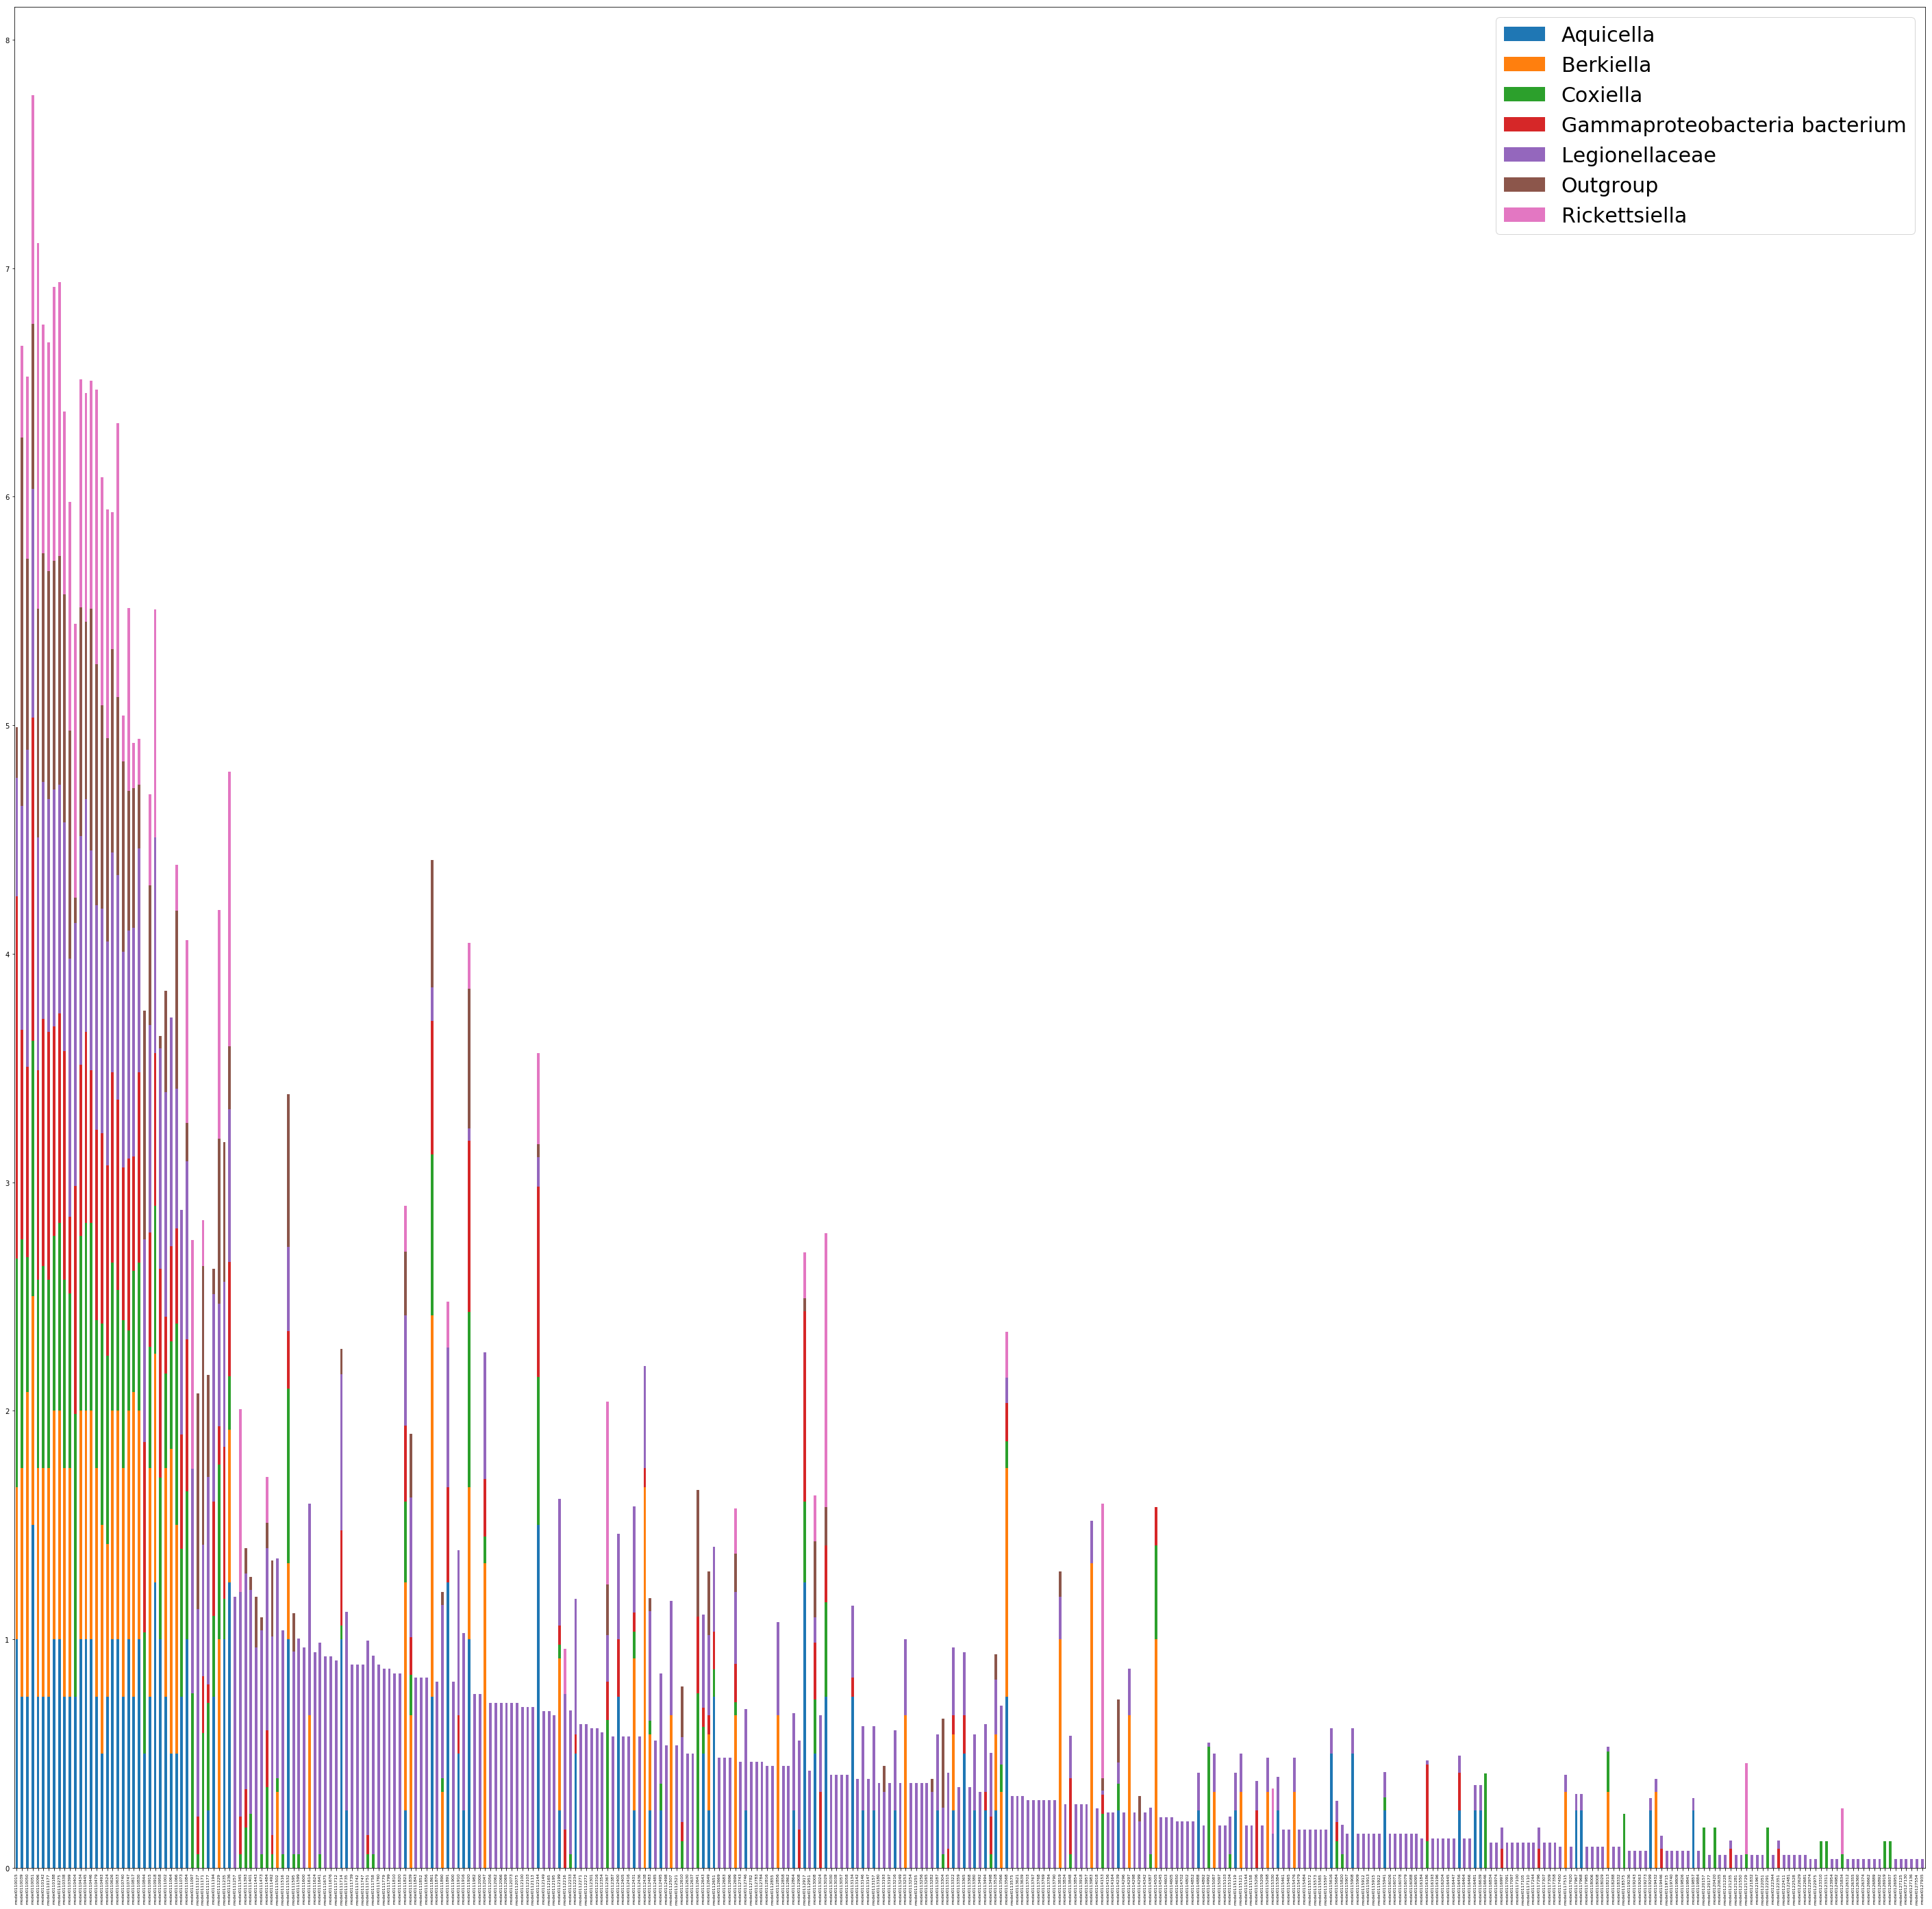

In [138]:
#Combined plot of model copy averages
sgrouped.mean().unstack().unstack().plot(kind='bar', align='center', figsize=(50,50), stacked=True)
plt.tick_params(axis='x', labelsize=6, labelrotation=90)
plt.legend(prop={'size':30})

In [115]:
#Shared within groups in sgroups
for name, group in sgrouped:
    n=0
    for col,dat in group.iteritems():
        #print col, dat
        if (col == 'bgroup' or col == 'sgroup'):
            print 'nothing'
        else:
            if 0.0 not in dat.value_counts().index:
                #print col, dat, n
                n += 1
    print name, n

nothing
nothing
Aquicella 16
nothing
nothing
Berkiella 33
nothing
nothing
Coxiella 0
nothing
nothing
Gammaproteobacteria bacterium 3
nothing
nothing
Legionellaceae 6
nothing
nothing
Outgroup 11
nothing
nothing
Rickettsiella 19


In [36]:
#The proportion of species per group having a certain model
propg={}
for name, group in sgrouped:
    coldict={}
    for col,dat in group.iteritems():
        if (col == 'bgroup' or col == 'sgroup'):
            print 'nothing'
        else:
            if 0.0 in dat.value_counts().index:
                n=dat.value_counts().loc[0.0]
        s=float(len(dat))
        present=s-n
        prop=present/s
        coldict[col]=prop
    propg[name]=coldict

nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing
nothing


In [69]:
#models not present in outgroup
nonout=[]
for key, val in propg['Outgroup'].iteritems():
    #print key, val
    if val==0.0:
        nonout.append(key)
        
len(nonout)
#nonout.sort()
#nonout
#propg['Outgroup']

292

In [118]:
#models not in outgroup but in Aquicella and Rickettsiella and others
aqui_notout=set(nonout) & set(aqui)
rick_notout=set(nonout) & set(rick)
berk_notout=set(nonout) & set(berk)
aqui_notout
#rick_notout
#berk_notout

{'model0110918',
 'model0111064',
 'model0111073',
 'model0111735',
 'model0111891',
 'model0111910',
 'model0111916',
 'model0112199',
 'model0112234',
 'model0112400',
 'model0112431',
 'model0112495',
 'model0112643',
 'model0112651',
 'model0112746',
 'model0112864',
 'model0113134',
 'model0113146',
 'model0113157',
 'model0113216',
 'model0113287',
 'model0113322',
 'model0113365',
 'model0113380',
 'model0113494',
 'model0113568',
 'model0114888',
 'model0115119',
 'model0115384',
 'model0115908',
 'model0115941',
 'model0116456',
 'model0116481',
 'model0116639',
 'model0117967',
 'model0117968',
 'model0119299',
 'model0119857'}

In [72]:
#checking proportions of model presence by small groups
propdf=pd.DataFrame.from_dict(propg)
propdf=propdf.T
propdf.drop(['bgroup', 'sgroup'],axis=1, inplace=True)
propdf

model0110015  model0110039  model0110050  \
Aquicella                          0.250000      0.750000      0.500000   
Berkiella                          0.333333      0.333333      0.333333   
Coxiella                           0.352941      0.882353      0.588235   
Gammaproteobacteria bacterium      0.583333      0.750000      0.833333   
Legionellaceae                     0.240741      0.981481      0.962963   
Outgroup                           0.111111      0.888889      0.777778   
Rickettsiella                      0.000000      0.400000      0.800000   

                               model0110051  model0110096  model0110142  \
Aquicella                          0.500000      0.750000      0.750000   
Berkiella                          0.333333      0.333333      0.333333   
Coxiella                           0.764706      0.823529      0.882353   
Gammaproteobacteria bacterium      0.750000      0.916667      0.916667   
Legionellaceae                     0.962963      0.981481      0.981481   
Outgroup                           0.611111      0.611111      0.611111   
Rickettsiella                      0.800000      0.800000      0.800000   

                               model0110177  model0110188  model0110275  \
Aquicella                          0.750000      0.750000      0.750000   
Berkiella                          0.333333      0.333333      0.333333   
Coxiella                           0.764706      0.764706      0.823529   
Gammaproteobacteria bacterium      0.916667      0.916667      0.916667   
Legionellaceae                     0.981481      0.981481      0.981481   
Outgroup                           0.611111      0.611111      0.611111   
Rickettsiella                      0.800000      0.800000      0.800000   

                               model0110338      ...       model0126889  \
Aquicella                          0.750000      ...           0.000000   
Berkiella                          0.333333      ...           0.000000   
Coxiella                           0.764706      ...           0.000000   
Gammaproteobacteria bacterium      0.916667      ...           0.000000   
Legionellaceae                     0.981481      ...           0.037037   
Outgroup                           0.611111      ...           0.000000   
Rickettsiella                      0.800000      ...           0.000000   

                               model0126892  model0126919  model0126937  \
Aquicella                          0.000000      0.000000      0.000000   
Berkiella                          0.000000      0.000000      0.000000   
Coxiella                           0.000000      0.117647      0.117647   
Gammaproteobacteria bacterium      0.000000      0.000000      0.000000   
Legionellaceae                     0.037037      0.000000      0.000000   
Outgroup                           0.000000      0.000000      0.000000   
Rickettsiella                      0.000000      0.000000      0.000000   

                               model0126955  model0127125  model0127130  \
Aquicella                          0.000000      0.000000      0.000000   
Berkiella                          0.000000      0.000000      0.000000   
Coxiella                           0.000000      0.000000      0.000000   
Gammaproteobacteria bacterium      0.000000      0.000000      0.000000   
Legionellaceae                     0.037037      0.037037      0.037037   
Outgroup                           0.000000      0.000000      0.000000   
Rickettsiella                      0.000000      0.000000      0.000000   

                               model0127136  model0127554  model0127935  
Aquicella                          0.000000      0.000000      0.000000  
Berkiella                          0.000000      0.000000      0.000000  
Coxiella                           0.000000      0.000000      0.000000  
Gammaproteobacteria bacterium      0.000000      0.000000      0.000000  
Legionellaceae                     0.037037      0.0370

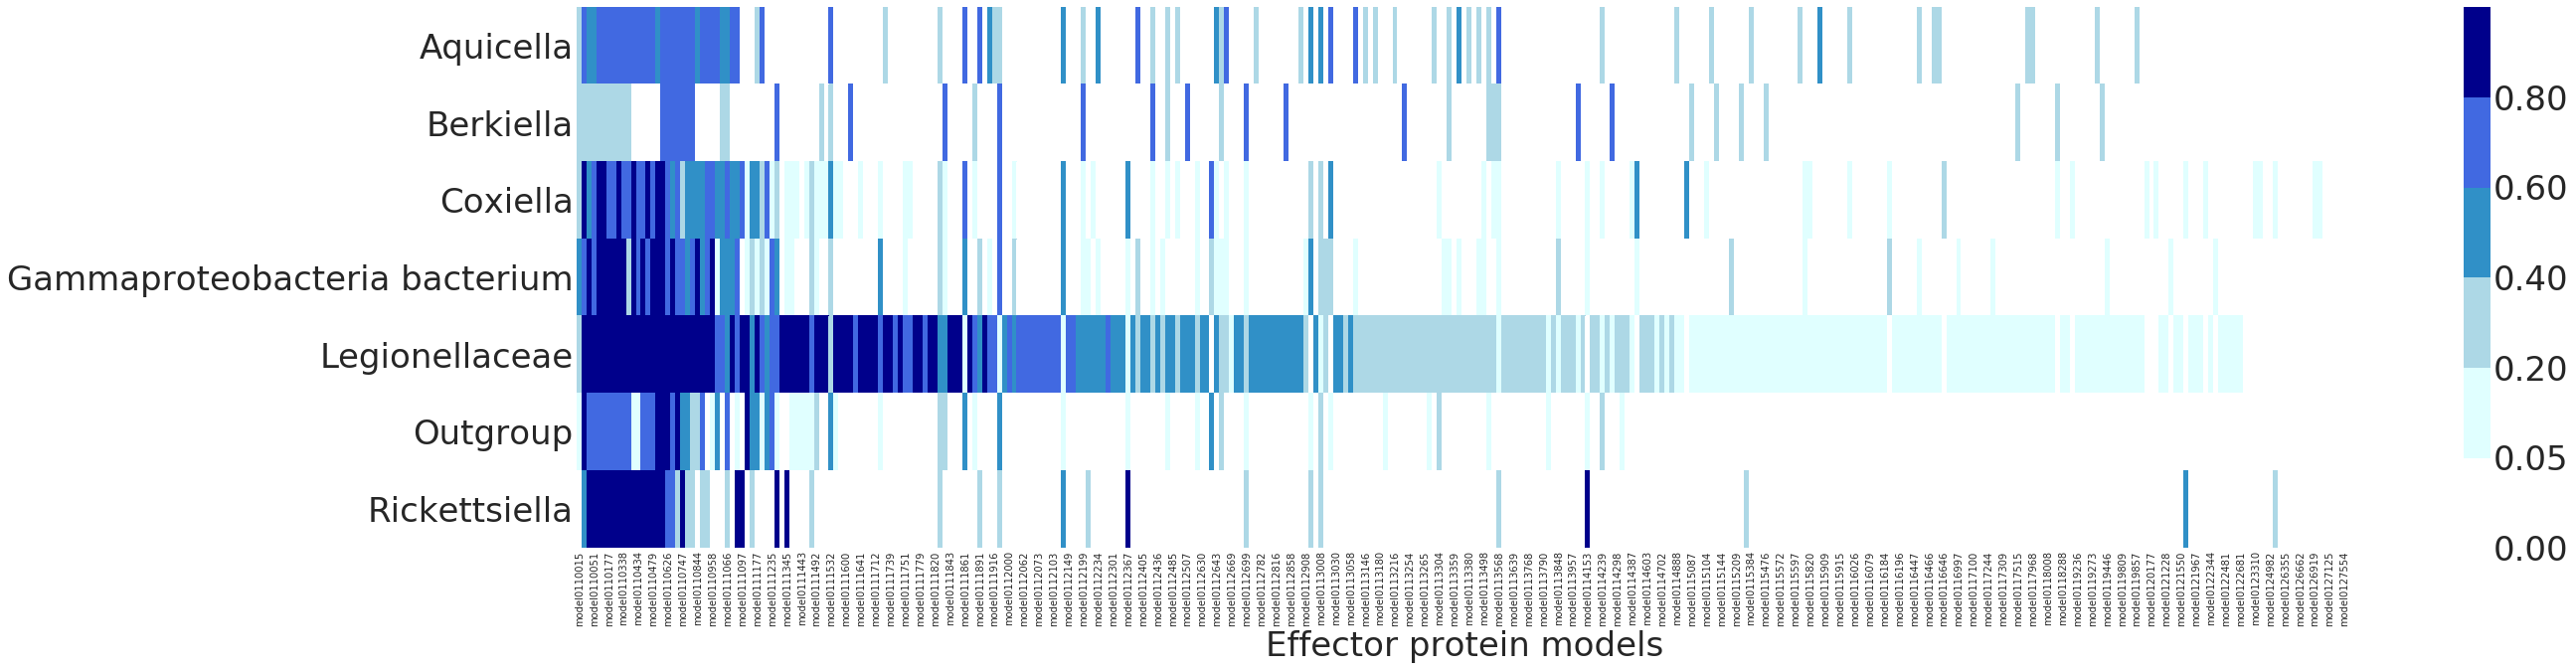

In [89]:
#plotting model proportions in a heatmap
figprop= plt.subplots(figsize=(40,10))
bounds=[0,0.05,0.2,0.4,0.6,0.8,1]
cmap=colors.ListedColormap(['white', 'LightCyan','lightblue','#3090C7','RoyalBlue', 'darkblue']) #, 'mediumblue','darkblue', 'purple'])
norm=colors.BoundaryNorm(bounds, cmap.N)
figprop=sns.heatmap(propdf,cmap=cmap, norm=norm, cbar_kws={"ticks":[0,0.05,0.2,0.4,0.6,0.8]})
plt.tick_params(axis='y', labelsize=34, labelrotation=0)
cax=plt.gcf().axes[-1]
cax.tick_params(labelsize=34)
plt.xlabel('Effector protein models', size=34)
sns.set_style('white')
plt.show(figprop)